In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
#from fancyimpute import KNN
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import KNN
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime

D:\Python_Setup\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
D:\Python_Setup\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#set working directory
os.chdir("D:\Edwisor#2\project#2_python")
os.getcwd()

'D:\\Edwisor#2\\project#2_python'

In [3]:
#Import Csv file
df = pd.read_csv("day.csv")
#check the class of the df
type(df)
#check the number of the variable and observation
df.shape

(731, 16)

In [4]:
#convert the variable into proper datatype
#df['dteday']      = df['dteday'].astype(object)
df['yr']          = df['yr'].astype(object)
df['workingday']  = df['workingday'].astype(object)
df['holiday']     = df['holiday'].astype(object)
df['season']      = df['season'].astype(object)
df['mnth']        = df['mnth'].astype(object)
df['weekday']     = df['weekday'].astype(object)
df['weathersit']  = df['weathersit'].astype(object)


In [5]:
#type(df['instant'])
#class(df['instant'])
#abc = pd.DataFrame(df)
#abc.describe()
#type(abc['instant'])
#print(str(a
df.info()
#pd.crosstab(index = df["workingday"],columns="count")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null object
mnth          731 non-null object
holiday       731 non-null object
weekday       731 non-null object
workingday    731 non-null object
weathersit    731 non-null object
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 91.5+ KB


In [6]:
#Impute the missing value
# for numerical values impute with mean
#for categorical values impute with mode
def Impute_missing(data):
    for i in range(0, len(data.columns)):
        if(df.iloc[:,i].dtypes == 'float64'):
            df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mean())
        elif (df.iloc[:,i].dtypes == 'int64'):
            df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mean())
        else:
            df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mode()[0])
    return data

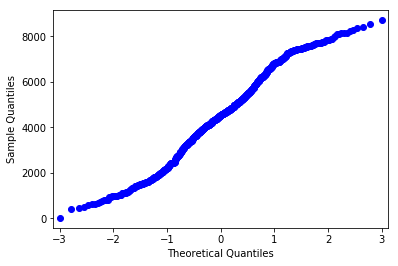

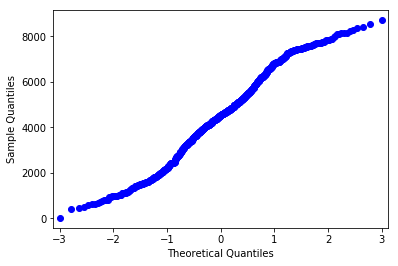

In [7]:
sm.qqplot(df['cnt'])
#now we have seen that the dependent variable is normally distributed.

In [8]:
#Create a list of categorical variable forwhich we have to make dummies
Cate_variable = ['season','mnth','weekday','weathersit']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null object
mnth          731 non-null object
holiday       731 non-null object
weekday       731 non-null object
workingday    731 non-null object
weathersit    731 non-null object
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 91.5+ KB


In [10]:
#Create Dummy variable for categorical value
def Create_Dummy(data,Cate_variable):
    for i in Cate_variable:
        dummy = pd.get_dummies(data[i],prefix = i , dummy_na = False)
        data = data.drop(i,1)
        data = pd.concat([data,dummy],axis = 1)
    return data

In [11]:
#Create the final dataset with all the dummy variable in it
df = Create_Dummy(df,Cate_variable)

In [12]:
#convert all the dummy variable into categorical variable
for i in range(0, len(df.columns)):
    if(df.iloc[:,i].dtypes == 'uint8'):
        df.iloc[:,i] = df.iloc[:,i].astype(object)

In [13]:
#create the list of the variable which need to be deleted
del_var = ['instant','dteday']

In [14]:
#Delete the variables
for i in del_var:
    df = df.drop(i,1)

{'boxes': [<matplotlib.lines.Line2D at 0xc0b86a0>],
 'caps': [<matplotlib.lines.Line2D at 0xc0c10f0>,
 'fliers': [<matplotlib.lines.Line2D at 0xc0c1d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc0c1940>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc0b87f0>,
  <matplotlib.lines.Line2D at 0xc0b8c88>]}

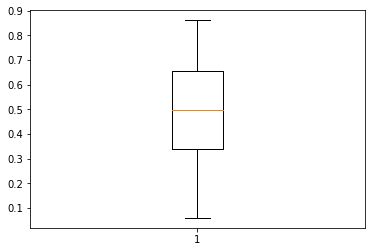

In [15]:
#Now we will find out the outlier using boxplot
plt.boxplot(df['temp'])
#outlier not present

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 36 columns):
yr              731 non-null object
holiday         731 non-null object
workingday      731 non-null object
temp            731 non-null float64
atemp           731 non-null float64
hum             731 non-null float64
windspeed       731 non-null float64
casual          731 non-null int64
registered      731 non-null int64
cnt             731 non-null int64
season_1        731 non-null object
season_2        731 non-null object
season_3        731 non-null object
season_4        731 non-null object
mnth_1          731 non-null object
mnth_2          731 non-null object
mnth_3          731 non-null object
mnth_4          731 non-null object
mnth_5          731 non-null object
mnth_6          731 non-null object
mnth_7          731 non-null object
mnth_8          731 non-null object
mnth_9          731 non-null object
mnth_10         731 non-null object
mnth_11         731 non-null o

{'boxes': [<matplotlib.lines.Line2D at 0xc1222e8>],
 'caps': [<matplotlib.lines.Line2D at 0xc122cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0xc1289b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc128588>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc122438>,
  <matplotlib.lines.Line2D at 0xc1228d0>]}

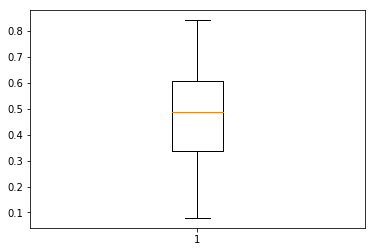

In [17]:
plt.boxplot(df['atemp'])
#outlier not present

{'boxes': [<matplotlib.lines.Line2D at 0xc17bf28>],
 'caps': [<matplotlib.lines.Line2D at 0xc185978>,
 'fliers': [<matplotlib.lines.Line2D at 0xc18d630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc18d208>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc1850b8>,
  <matplotlib.lines.Line2D at 0xc185550>]}

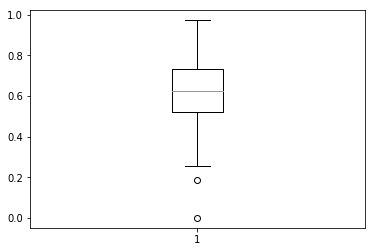

In [18]:
plt.boxplot(df['hum'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xc1e3320>],
 'caps': [<matplotlib.lines.Line2D at 0xc1e3d30>,
 'fliers': [<matplotlib.lines.Line2D at 0xc1ee9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc1ee5c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc1e3470>,
  <matplotlib.lines.Line2D at 0xc1e3908>]}

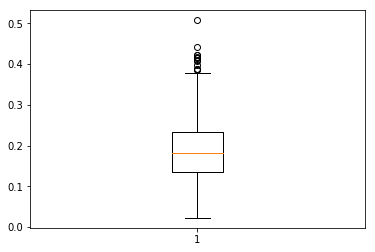

In [19]:
plt.boxplot(df['windspeed'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xc243588>],
 'caps': [<matplotlib.lines.Line2D at 0xc243f98>,
 'fliers': [<matplotlib.lines.Line2D at 0xc24ac50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc24a828>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc2436d8>,
  <matplotlib.lines.Line2D at 0xc243b70>]}

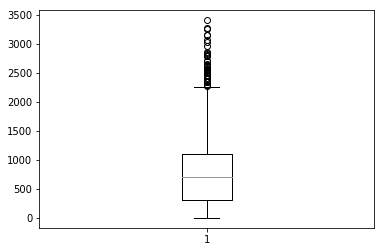

In [20]:
plt.boxplot(df['casual'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xc2ab1d0>],
 'caps': [<matplotlib.lines.Line2D at 0xc2abbe0>,
 'fliers': [<matplotlib.lines.Line2D at 0xc2b3898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc2b3470>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc2ab320>,
  <matplotlib.lines.Line2D at 0xc2ab7b8>]}

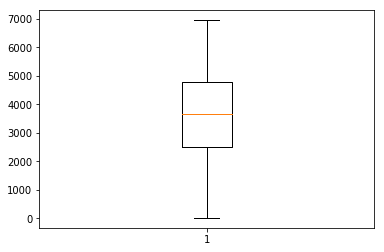

In [21]:
plt.boxplot(df['registered'])
#outlier not present

In [22]:
#From above boxplot of the continous variable we have seen that there are outlier present in few of the numerical variables
#now we will remove the outliers from numerical variables
#Create a list of numerical variables

num_val = ['temp','atemp','hum','windspeed','casual','registered','cnt']

In [23]:
#Detect and replace the outlier with NA
for i in num_val:
    q75,q25 = np.nanpercentile(df.loc[:,i],[75,25])

    iqr = q75-q25
    
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    df.loc[df.loc[:,i] < minimum,i] = np.nan
    df.loc[df.loc[:,i] > maximum,i] = np.nan
    
    print(i,' Missing value ---------- :- ',df.loc[:,i].isnull().sum())

temp  Missing value ---------- :-  0
atemp  Missing value ---------- :-  0
hum  Missing value ---------- :-  2
windspeed  Missing value ---------- :-  13
casual  Missing value ---------- :-  44
registered  Missing value ---------- :-  0
cnt  Missing value ---------- :-  0


In [24]:
#call the function impute_missing to impute the missing value
Impute_missing(df)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,...,0,0,0,1,0,0,0,1,0,0
5,0,0,1,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606.0,...,0,0,0,0,1,0,0,1,0,0
6,0,0,1,0.196522,0.208839,0.498696,0.168726,148.0,1362.0,1510.0,...,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0.165000,0.162254,0.535833,0.266804,68.0,891.0,959.0,...,0,0,0,0,0,0,1,0,1,0
8,0,0,0,0.138333,0.116175,0.434167,0.361950,54.0,768.0,822.0,...,1,0,0,0,0,0,0,1,0,0
9,0,0,1,0.150833,0.150888,0.482917,0.223267,41.0,1280.0,1321.0,...,0,1,0,0,0,0,0,1,0,0


In [25]:
#find out the number missing value
missing_val = pd.DataFrame(df.isnull().sum())
print(missing_val)

              0
yr            0
holiday       0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
season_1      0
season_2      0
season_3      0
season_4      0
mnth_1        0
mnth_2        0
mnth_3        0
mnth_4        0
mnth_5        0
mnth_6        0
mnth_7        0
mnth_8        0
mnth_9        0
mnth_10       0
mnth_11       0
mnth_12       0
weekday_0     0
weekday_1     0
weekday_2     0
weekday_3     0
weekday_4     0
weekday_5     0
weekday_6     0
weathersit_1  0
weathersit_2  0
weathersit_3  0


In [26]:
#Create a dataset with all the numerical variable in it
df_corr = df.loc[:,num_val]

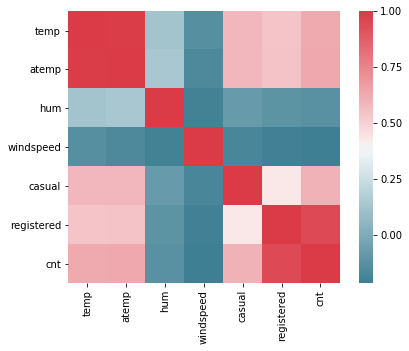

In [27]:
#set the width and height of the plot
wd , ht = plt.subplots(figsize=(7,5))

#Generate correlation matrix
corr = df_corr.corr()

#plot heat map seaborn library
sns.heatmap(corr,mask = np.zeros_like(corr,dtype = np.bool),cmap=sns.diverging_palette(220,10,as_cmap = True),
            square = True,ax= ht)

In [28]:
#Now from the above correlation plot we can drop one of those independent variable which are highly corelated
df = df.drop('atemp',1)

In [29]:
#Create a new dataframe of dependent variable
dep_var = pd.DataFrame(df['cnt'])

#Rename the variable
dep_var = dep_var.rename(columns={'cnt': 'Bike_Rent'})

In [30]:
#Take out the dependent variable from the dataset
df = df.drop('cnt',1)

In [31]:
#Merge the dependent variable andindependent variable to make final dataset
final_df = pd.concat([dep_var,df],axis=1)

print(final_df.shape)

(731, 35)


In [32]:
#Split the data into test and train data using sklearn library
train,test = train_test_split(final_df,test_size = 0.3)

In [67]:
#Build the linear regression model
lm_model = sm.OLS(train.iloc[:,0],train.iloc[:,1:35]).fit()

In [68]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Bike_Rent   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     545.6
Date:                Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:11:20   Log-Likelihood:                -3689.7
No. Observations:                 511   AIC:                             7439.
Df Residuals:                     481   BIC:                             7566.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr              24.7048     52.705      0.469      0.639     -78.856     128.265
holiday        103.4854     74.317      1.392      0.164     -42.541     249.512
workingday    -410.2347     50.540     -8.117      0.000    -509.541    -310.928
temp          1098.0126    241.857      4.540      0.000     622.786    1573.240
hum           -353.6230    164.273     -2.153      0.032    -676.404     -30.842
windspeed     -604.9409    236.588     -2.557      0.011   -1069.815    -140.067
casual           0.2612      0.051      5.124      0.000       0.161       0.361
registered       1.1173      0.026     43.531      0.000       1.067       1.168
season_1        83.4308     72.352      1.153      0.249     -58.735     225.597
season_2       223.0548     73.955      3.016      0.003      77.741     368.369
season_3        81.9113     80.729      1.015      0.311     -76.714     240.537
season_4       -61.4168     82.505     -0.744      0.457    -223.532     100.699
mnth_1         -56.5776     89.713     -0.631      0.529    -232.855     119.700
mnth_2         -69.1356     85.853     -0.805      0.421    -237.829      99.558
mnth_3          82.5975     66.484      1.242      0.215     -48.037     213.232
mnth_4          33.0085     81.922      0.403      0.687    -127.961     193.978
mnth_5          52.0684     89.487      0.582      0.561    -123.765     227.901
mnth_6        -144.1018     84.650     -1.702      0.089    -310.432      22.228
mnth_7          42.5413     98.737      0.431      0.667    -151.468     236.551
mnth_8         -41.3755     92.078     -0.449      0.653    -222.300     139.549
mnth_9         123.7382     76.910      1.609      0.108     -27.384     274.860
mnth_10        230.6366     84.810      2.719      0.007      63.993     397.280
mnth_11        101.5619     87.167      1.165      0.245     -69.713     272.837
mnth_12        -27.9818     76.111     -0.368      0.713    -177.534     121.570
weekday_0      271.5912     60.852      4.463      0.000     152.023     391.160
weekday_1      -35.5643     38.980     -0.912      0.362    -112.156      41.027
weekday_2     -109.6973     39.944     -2.746      0.006    -188.183     -31.211
weekday_3     -107.9730     41.378     -2.609      0.009    -189.276     -26.670
weekday_4     -106.7262     42.436     -2.515      0.012    -190.109     -23.344
weekday_5       53.2115     42.475      1.253      0.211     -30.249     136.672
weekday_6      362.1382     59.222      6.115      0.000     245.773     478.503
weathersit_1   130.4918     57.515      2.269      0.024      17.479     243.504
weathersit_2   108.2451     61.827      1.751      0.081     -13.239     229.729
weathersit_3    88.2433    103.447      0.853      0.394    -115.020     291.506
==============================================================================
Omnibus

In [35]:
#Make the predictions
lm_prediction = lm_model.predict(test.iloc[:,1:35])

In [36]:
#create function for calculating the MAPE
def MAPE(y_true, y_pred): 
    mask = y_true != 0
    return ((np.fabs(y_true - y_pred)/y_true)[mask].mean())*100

In [37]:
#sqrt(mean_squared_error(test.iloc[:,0], lm_prediction))
mean_squared_error(test.iloc[:,0], lm_prediction)

125368.79452732434

In [38]:
#test.iloc[:,0]

In [39]:
#Now we will select only the significant variables and create the model and check the error rate
train_improve = train[['holiday','workingday',
                 'temp','hum','windspeed',
                 'casual','registered',
                 'season_2','mnth_3','mnth_4','mnth_10','weekday_0','weekday_2','weekday_4','weekday_6']]

In [40]:
#Test data
test_improve = test[['holiday','workingday',
                 'temp','hum','windspeed',
                 'casual','registered',
                 'season_2','mnth_3','mnth_4','mnth_10','weekday_0','weekday_2','weekday_4','weekday_6']]

In [41]:
#Build the linear regression model again with significant variable
lm_model_improve = sm.OLS(train.iloc[:,0],train_improve).fit()

In [42]:
lm_model_improve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Bike_Rent   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1104.
Date:                Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:58:22   Log-Likelihood:                -3703.0
No. Observations:                 511   AIC:                             7436.
Df Residuals:                     496   BIC:                             7499.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday      207.5227    135.274      1.534      0.126     -58.258     473.303
workingday  -336.7254    117.424     -2.868      0.004    -567.434    -106.017
temp        1172.4271    126.755      9.250      0.000     923.385    1421.469
hum         -358.4007    123.181     -2.910      0.004    -600.421    -116.380
windspeed   -551.1361    230.914     -2.387      0.017   -1004.826     -97.446
casual         0.2970      0.049      6.021      0.000       0.200       0.394
registered     1.1188      0.014     78.678      0.000       1.091       1.147
season_2     124.8328     44.910      2.780      0.006      36.595     213.070
mnth_3       130.6616     56.072      2.330      0.020      20.494     240.829
mnth_4        69.9623     67.943      1.030      0.304     -63.529     203.453
mnth_10      113.2554     60.181      1.882      0.060      -4.986     231.497
weekday_0    374.7884    118.467      3.164      0.002     142.030     607.547
weekday_2    -68.3491     45.167     -1.513      0.131    -157.091      20.393
weekday_4    -65.0155     49.475     -1.314      0.189    -162.223      32.192
weekday_6    466.1488    119.168      3.912      0.000     232.013     700.285
==============================================================================
Omnibus:                      216.875   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              975.280
Skew:                           1.883   Prob(JB):                    1.66e-212
Kurtosis:                       8.624   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#Make the improve predictions
lm_prediction_improve = lm_model_improve.predict(test_improve)

In [44]:
#calulate MAPE
MAPE(test.iloc[:,0],lm_prediction_improve)

7.461627001561393

In [45]:
#Now we have seen that MAPE and MSE is reduced with significant variables

#MAPE BEFORE : 128764.39784602242%
#MAPE ACCURACY BEFORE : 0%

#MAPE AFTER : 15%
#MAPE ACCURACY AFTER : 85%



In [46]:
################################   CROSS VALIDATION   ##############################################

In [47]:
#Now we will perform cross validation to check the underfitting and overfitting of the data

#First make the predictions on train data
lm_prediction_improve_CV_train = lm_model_improve.predict(train_improve)

In [48]:
#Calculate the error in training data
MAPE(train.iloc[:,0],lm_prediction_improve_CV_train)

9.230328237114078

In [49]:
#Make the predictions on test data
lm_prediction_improve_CV_test = lm_model_improve.predict(test_improve)

In [50]:
#Calculate the error in testing data
MAPE(test.iloc[:,0],lm_prediction_improve_CV_test)

7.461627001561393

In [51]:
#########################    AGAIN BUILD THE MODEL  ####################################

In [52]:
#from above we have seen that the error in training dataset and testing data is very high this might be the case
#of over fitting(variance)
#Now we will split the data into 60:40 for train and test respectively 

train_cv ,test_cv = train_test_split(final_df,test_size = 0.4)

In [53]:
#Now we will select only the significant variables and create the model and check the error rate
train_improve_cv = train_cv[['holiday','workingday',
                 'temp','hum','windspeed',
                 'casual','registered',
                 'season_2','mnth_3','mnth_4','mnth_10','weekday_0','weekday_2','weekday_4','weekday_6']]
test_improve_cv = test_cv[['holiday','workingday',
                 'temp','hum','windspeed',
                 'casual','registered',
                 'season_2','mnth_3','mnth_4','mnth_10','weekday_0','weekday_2','weekday_4','weekday_6']]


In [54]:
#Build the linear regression model again with significant variable
lm_model_train_cv = sm.OLS(train_improve_cv.iloc[:,0],train_improve_cv).fit()

In [55]:
#make the predictions on test data
lm_prediction_train_cv = lm_model_train_cv.predict(test_improve_cv)

In [56]:
#Calculate MAPE
MAPE(test_improve_cv.iloc[:,0],lm_prediction_train_cv)

2.5690560789826122e-11

In [57]:
#Calculate the MSE 
mean_squared_error(test_improve_cv.iloc[:,0], lm_prediction_train_cv)

1.6826672723477214e-25

In [58]:
#Now we have seen that MAPE and MSE is reduced with Correct split of data and the accuracy is close to 100%

#MAPE  : 1.6576739980678212e-11%
#MAPE ACCURACY  : 99.99%

#MSE  : 5.999639555941441e-26
#MSE ACCURACY  : 99.999%

In [59]:
################################     RANDOM FOREST    ############################

In [60]:
#Split the data into test and train data using sklearn library
train_rf,test_rf = train_test_split(final_df,test_size = 0.4)

In [61]:
rf_model = RandomForestRegressor(n_estimators = 100,oob_score = True ,random_state = 0,max_features = 'auto')

In [62]:
rf_model.fit(train_rf.iloc[:,1:35],train_rf.iloc[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [63]:
Prediction = rf_model.predict(test_rf.iloc[:,1:35])

In [70]:
MAPE(test_rf.iloc[:,0],Prediction)

13.180241064646983

In [65]:
#Imporatance of the variables
rf_model.feature_importances_

array([8.19360029e-04, 2.68484266e-04, 2.21694121e-02, 5.15573207e-03,
       2.21948753e-03, 1.64325345e-03, 6.38657074e-02, 8.99235454e-01,
       8.11643434e-05, 2.83619327e-04, 1.36042341e-04, 3.39707371e-04,
       5.39305402e-05, 2.47027524e-05, 1.80682718e-04, 1.68274092e-04,
       2.21042544e-04, 5.08715176e-05, 1.10624566e-04, 2.04650402e-04,
       2.54745243e-04, 7.55583421e-05, 2.66281894e-04, 2.01647237e-04,
       3.79184459e-04, 1.14543721e-04, 7.36280673e-05, 5.70216280e-05,
       5.97118319e-05, 1.42331622e-04, 9.15397068e-04, 1.02722080e-04,
       1.08441035e-04, 1.65819898e-05])

In [66]:
#The ERROR rate and ACCURACY
#MAPE error : 3.4 %
#MAPE Accuracy : 96.6%